In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('census_income.csv')

In [3]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [4]:
df.shape

(32560, 15)

# EDA
Null/NaN

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
categorical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")
num_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Columns: ", num_col)
print("\n")

Categorical Columns:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical Columns:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']




In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [92]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [93]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [94]:
df.nunique().to_frame("No of unique values")

,No of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


# 2. Label Encoder

In [95]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


# 3. Skewness, Outliars (We donot remove Skewness and Outliars from categorial columns)

In [96]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


# Note 2: Observations:
- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK
- Median (50%) > Mean - "Native_country" --> Left Skewed
- Median (50%) < Mean - "Age","Capital_gain","Capital_loss"-> Right Skewed
- Standard Dev for "Age","Capital_gain","Capital_loss","Hours_per_week"is high -> Outliars are present
- Percentile 75% and max : It is there in "Age","Capital_gain","Capital_loss","Hours_per_week" -> outliars are present
    

In [97]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Capital_gain and Capital_loss is skewed

In [98]:
x = ['Capital_gain', 'Capital_loss']

for i in x:
    df[i] = np.cbrt(df[i])   # Remove Skewness

In [99]:
df.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

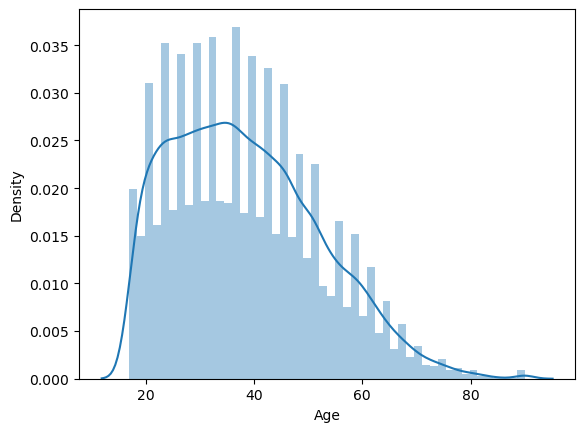

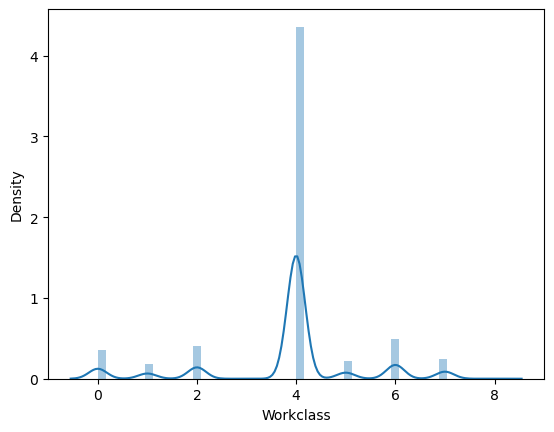

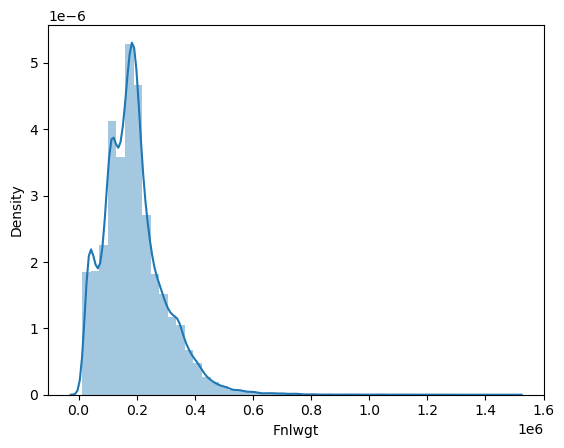

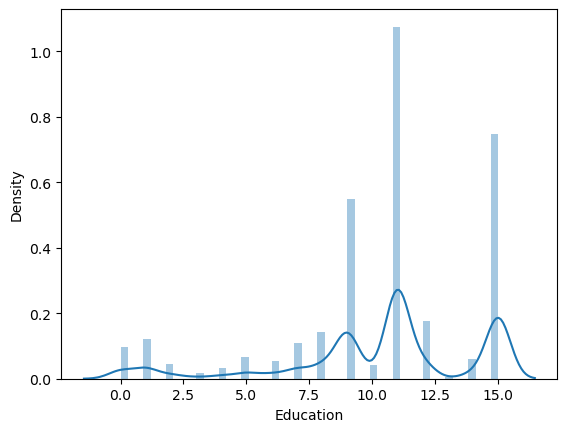

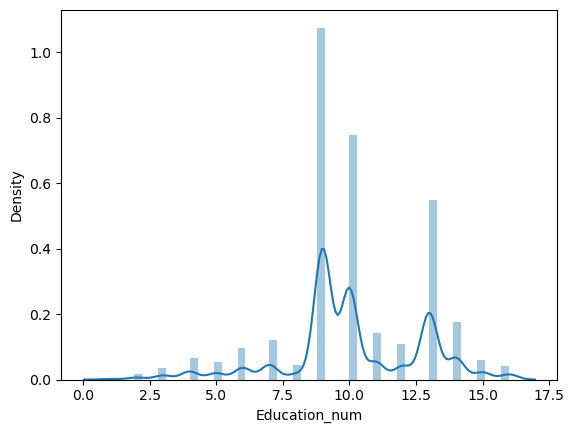

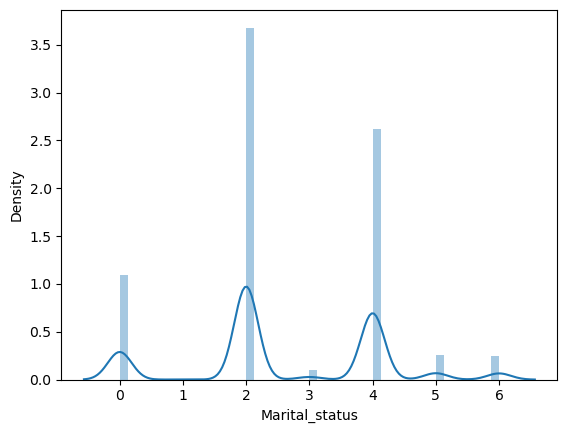

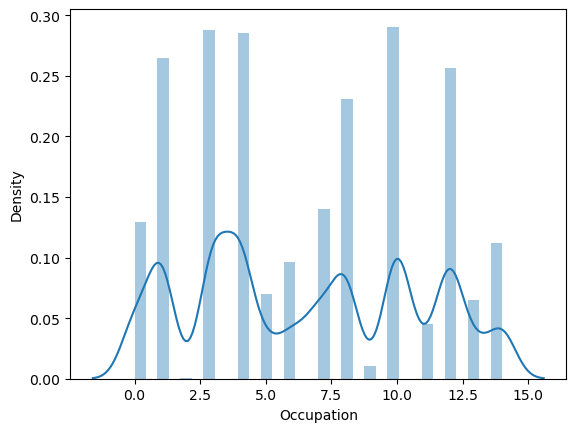

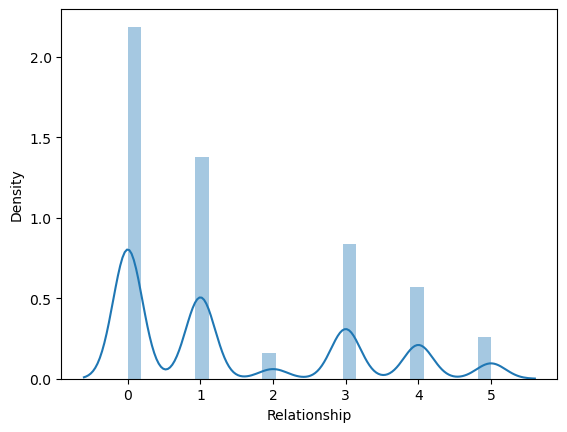

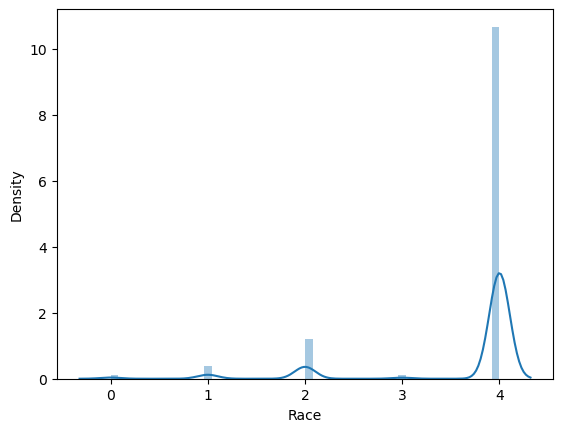

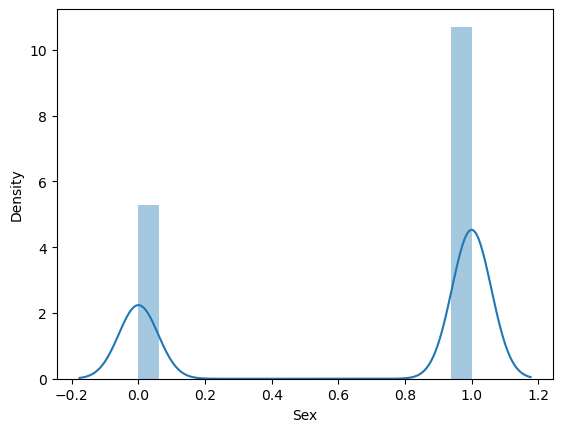

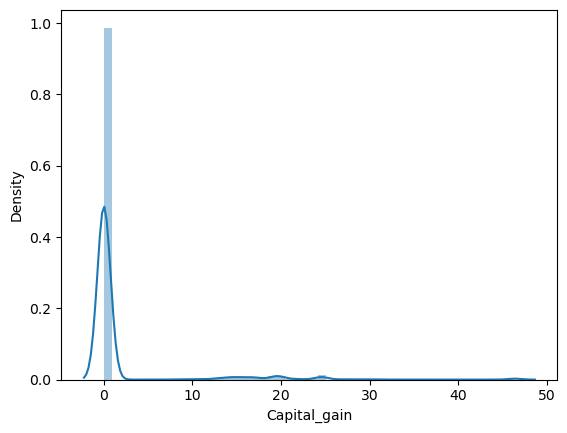

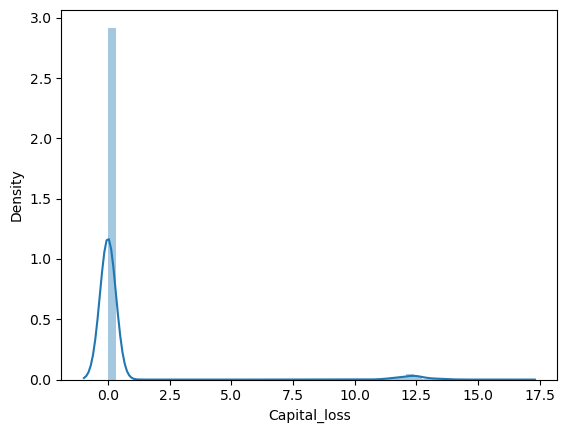

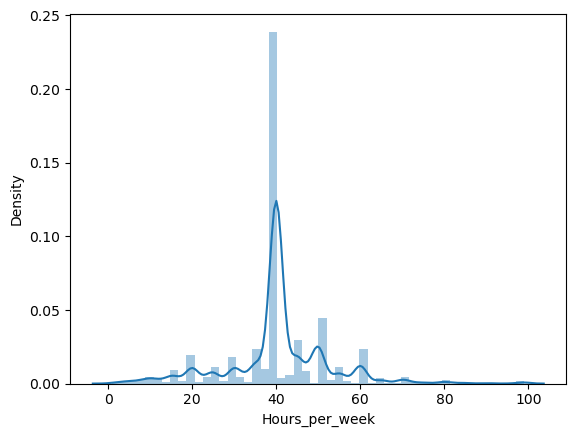

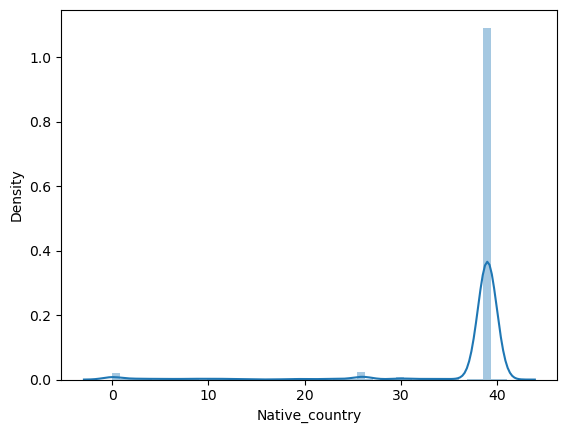

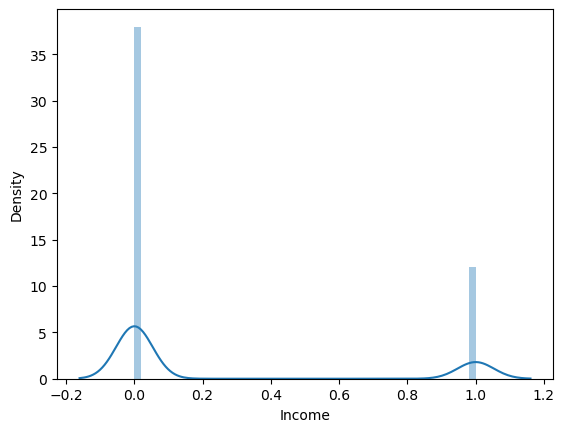

In [36]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

Age                  Axes(0.125,0.825775;0.168478x0.0542254)
Workclass         Axes(0.327174,0.825775;0.168478x0.0542254)
Fnlwgt            Axes(0.529348,0.825775;0.168478x0.0542254)
Education         Axes(0.731522,0.825775;0.168478x0.0542254)
Education_num        Axes(0.125,0.760704;0.168478x0.0542254)
Marital_status    Axes(0.327174,0.760704;0.168478x0.0542254)
Occupation        Axes(0.529348,0.760704;0.168478x0.0542254)
Relationship      Axes(0.731522,0.760704;0.168478x0.0542254)
Race                 Axes(0.125,0.695634;0.168478x0.0542254)
Sex               Axes(0.327174,0.695634;0.168478x0.0542254)
Capital_gain      Axes(0.529348,0.695634;0.168478x0.0542254)
Capital_loss      Axes(0.731522,0.695634;0.168478x0.0542254)
Hours_per_week       Axes(0.125,0.630563;0.168478x0.0542254)
Native_country    Axes(0.327174,0.630563;0.168478x0.0542254)
Income            Axes(0.529348,0.630563;0.168478x0.0542254)
dtype: object

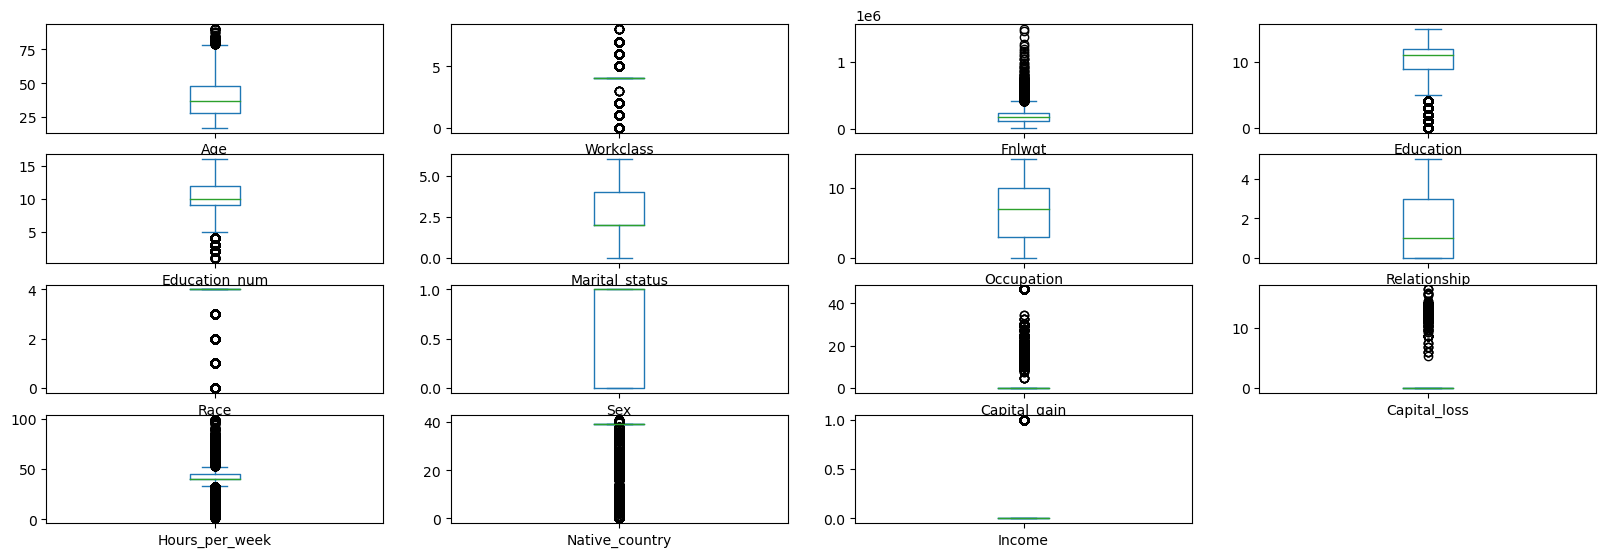

In [37]:
df.plot(kind='box',subplots=True,layout=(12,4),figsize=(20,20))

Note 3: Observations: . Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Native_country has major outliares.

Others having outliars are Workclass,Education,Race

# Remove Outliers

In [61]:
from scipy.stats import zscore
ol = ['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week','Native_country']
x_x=0
for i in ol:
    y_y=0
    col = df[i]
    z=zscore(col)
    thresh =3
    df1 = df[(z < thresh) & (z > -thresh)]
    y_y = df.shape[0]-df1.shape[0]
    x_x= x_x + y_y

print("Data loss rate",(x_x/df.shape[0])*100)

Data loss rate 15.54054054054054


# 4. Co- Relation and Multicolinearity

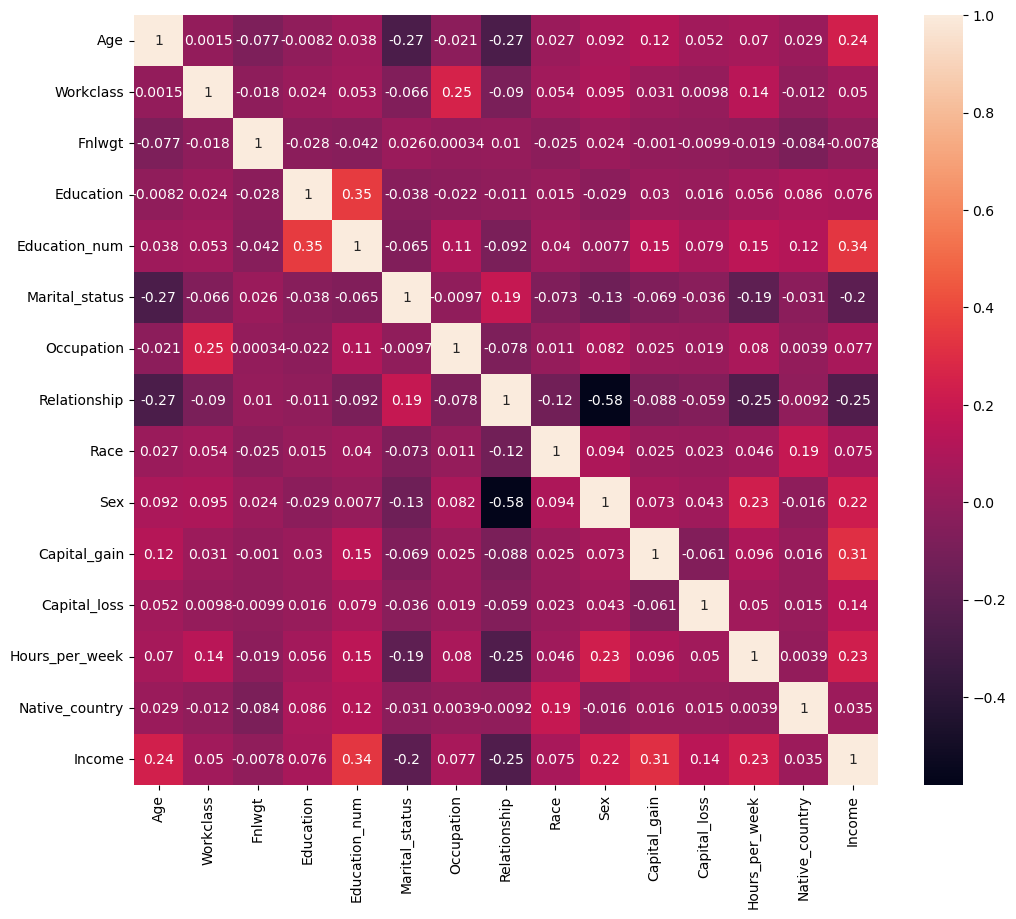

In [39]:
corr_hmap=df1.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

- Near to Zero : No Corelation- Low Corelation Worst - "Workclass","Fnlwgt","Education"."Native_country"
- 0.3 or >-0.3 --> "Education_num","Capital_gain"
- 0.5 or >-0.5 --> Mod Corelation -
- 0.7 or >-0.7 --> High Corelation 


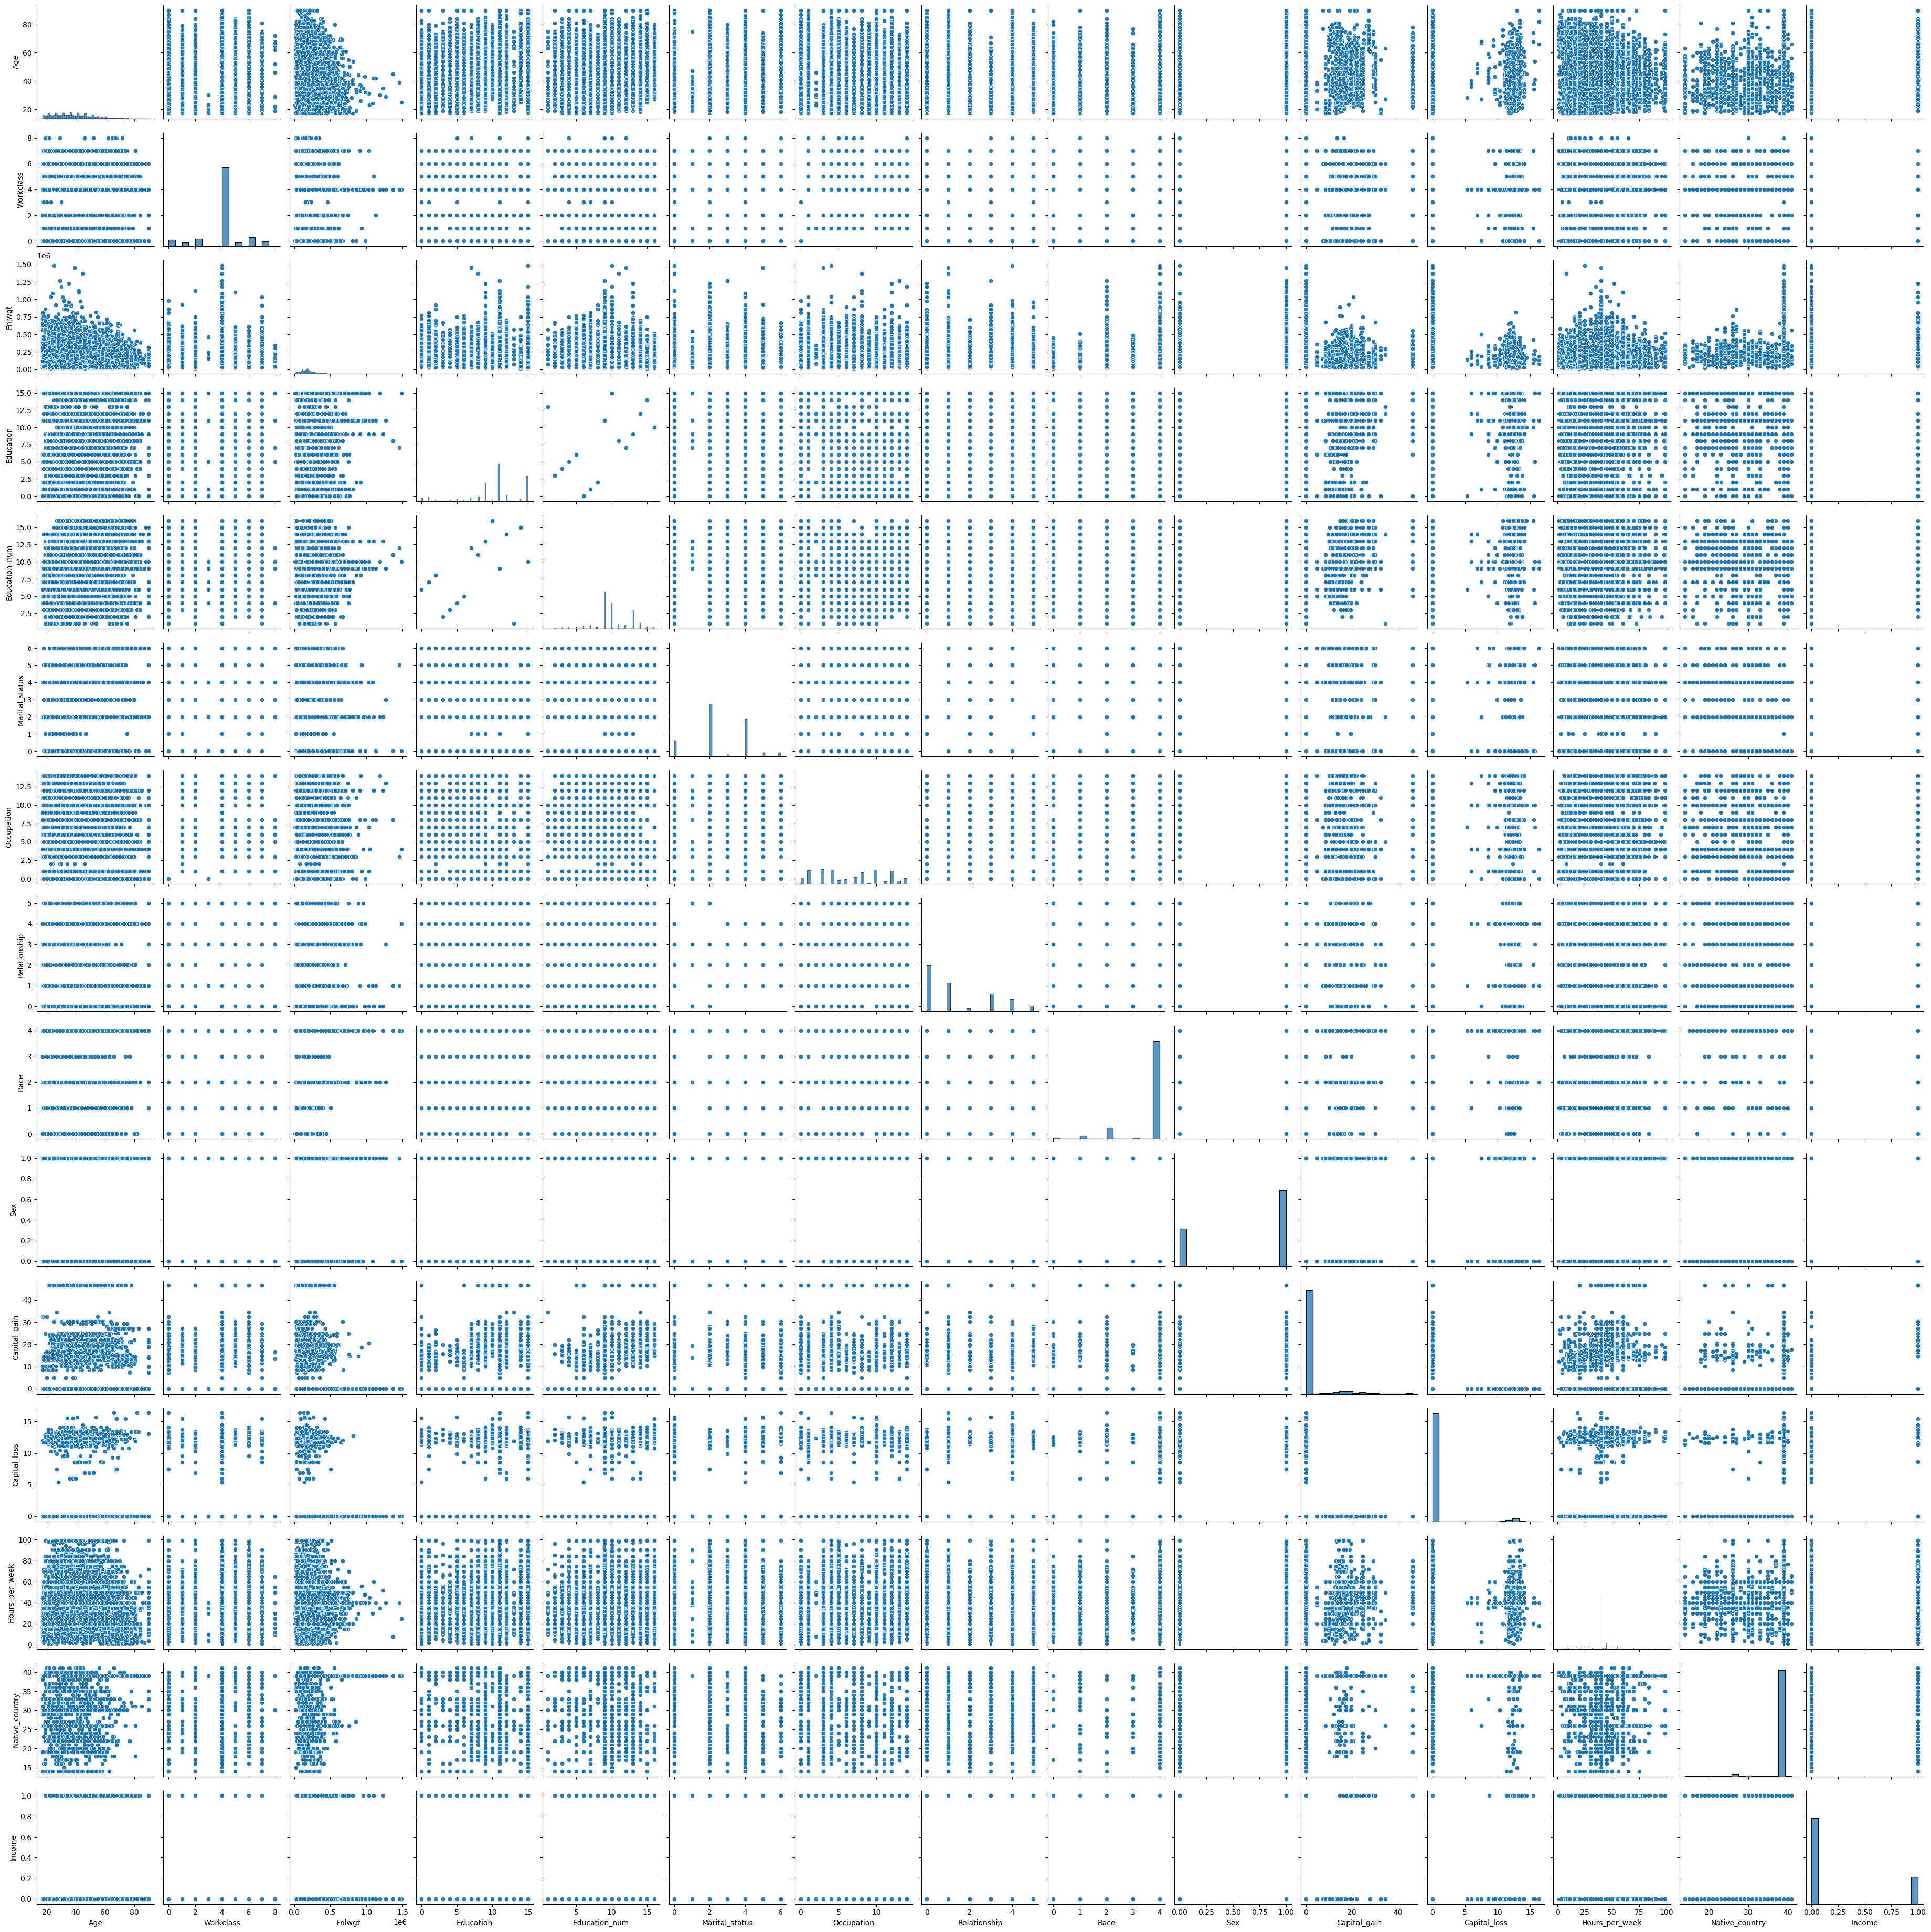

In [41]:
sns.pairplot(df1)

In [62]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,0:-1]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

    VIF Factor        features
0     8.557556             Age
1     8.476458       Workclass
2     4.031804          Fnlwgt
3     9.215300       Education
4    18.475375   Education_num
5     3.980727  Marital_status
6     3.711257      Occupation
7     2.613556    Relationship
8    17.575026            Race
9     4.442547             Sex
10    1.127130    Capital_gain
11    1.067801    Capital_loss
12   12.149083  Hours_per_week
13   19.726429  Native_country


In [64]:
columns_to_drop=['Education_num','Race','Native_country','Hours_per_week'] # Least co-relation with output and high multicollinearity
df = df.drop(columns_to_drop, axis=1)
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Income
0,50,6.0,83311,9.0,2.0,4.0,0.0,1.0,0.000000,0.0,0.0
1,38,4.0,215646,11.0,0.0,6.0,1.0,1.0,0.000000,0.0,0.0
2,53,4.0,234721,1.0,2.0,6.0,0.0,1.0,0.000000,0.0,0.0
3,28,4.0,338409,9.0,2.0,10.0,5.0,0.0,0.000000,0.0,0.0
4,37,4.0,284582,12.0,2.0,4.0,5.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,2.0,13.0,5.0,0.0,0.000000,0.0,0.0
32556,40,4.0,154374,11.0,2.0,7.0,0.0,1.0,0.000000,0.0,1.0
32557,58,4.0,151910,11.0,6.0,1.0,4.0,0.0,0.000000,0.0,0.0
32558,22,4.0,201490,11.0,4.0,1.0,3.0,1.0,0.000000,0.0,0.0


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,0:-1]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

   VIF Factor        features
0    6.577044             Age
1    7.619671       Workclass
2    3.884846          Fnlwgt
3    6.616747       Education
4    3.706228  Marital_status
5    3.588187      Occupation
6    2.416049    Relationship
7    3.948167             Sex
8    1.107555    Capital_gain
9    1.060597    Capital_loss


# MODEL
Feature Scaling using Standard Scalarization

In [66]:
y=df["Income"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss
0,0.837097,1.463883,-1.008742,-0.335443,-0.406183,-0.608434,-0.900177,0.703087,-0.278624,-0.220559
1,-0.042640,0.090121,0.245046,0.181319,-1.734026,-0.135480,-0.277810,0.703087,-0.278624,-0.220559
2,1.057031,0.090121,0.425770,-2.402489,-0.406183,-0.135480,-0.900177,0.703087,-0.278624,-0.220559
3,-0.775755,0.090121,1.408146,-0.335443,-0.406183,0.810427,2.211658,-1.422298,-0.278624,-0.220559
4,-0.115952,0.090121,0.898170,0.439700,-0.406183,-0.608434,2.211658,-1.422298,-0.278624,-0.220559
...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.090121,0.639710,-0.852204,-0.406183,1.519858,2.211658,-1.422298,-0.278624,-0.220559
32556,0.103982,0.090121,-0.335466,0.181319,-0.406183,0.100997,-0.900177,0.703087,-0.278624,-0.220559
32557,1.423589,0.090121,-0.358811,0.181319,2.249503,-1.317864,1.589291,-1.422298,-0.278624,-0.220559
32558,-1.215624,0.090121,0.110927,0.181319,0.921660,-1.317864,0.966924,0.703087,-0.278624,-0.220559


# 2. OverSampling

In [67]:
y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

In [68]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1=SM.fit_resample(x,y)

In [69]:
y1.value_counts()

0.0    24719
1.0    24719
Name: Income, dtype: int64

# 3. Best random state value:

In [70]:
y1.unique() # Will apply classification model

array([0., 1.])

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.8989347357065803  at random state  68


# 4. Creating train test split

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# 5. Classification Algorithms and Cross Validation Score

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
lg=LogisticRegression()
svc=SVC(kernel = "linear")
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(criterion = "gini")



model=[rfc,etc,lg,svc,gbc,abc,bc,gnb,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of:  ",m," is " )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")
    score = cross_val_score(m,x1,y1)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",accuracy_score(y_test,predm)-score.mean())
    print("\n")

Accuracy Score of:   RandomForestClassifier()  is 
0.8968446601941747
[[6587  814]
 [ 716 6715]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      7401
         1.0       0.89      0.90      0.90      7431

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832



Cross Validation of:   RandomForestClassifier()  is 
[0.82493932 0.87085356 0.92465615 0.92414281 0.92727824]
0.8943740174162207
Diff in Acc Score and Cross Val Score is -  0.0024706427779540574


Accuracy Score of:   ExtraTreesClassifier()  is 
0.8960355987055016
[[6530  871]
 [ 671 6760]]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      7401
         1.0       0.89      0.91      0.90      7431

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted a

# Best Model is : RandomForestClassifier

# 6. Hyper Parameter Tuning

In [103]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [104]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [105]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [107]:
GCV.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [108]:
RFC_final = RandomForestClassifier(
  bootstrap =  False,
  max_depth = 30,
  min_samples_leaf = 2,
  min_samples_split = 5,
  n_estimators =  150,
  random_state=maxRS )
RFC_final.fit(x_train,y_train)
pred=RFC_final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.67098166127292


# 7. Saving the Model

In [109]:
import joblib # save as *.pkl
joblib.dump(RFC_final,"census_income (1).csv.pkl")

['census_income (1).csv.pkl']